In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
from ucimlrepo import fetch_ucirepo

# Carregar o conjunto de dados
data = fetch_ucirepo(id=296)

# data (as pandas dataframes) 
X = data.data.features 
y = data.data.targets 
  
# metadata 
print(data.metadata) 
  
# variable information 
print(data.variables) 

{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/home/flavio/anaconda3/envs/myenv/lib/python3.9/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [3]:
from sklearn.impute import KNNImputer

# Verificar valores ausentes
print(X.isnull().sum())

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Imputação com KNN
knn_imputer = KNNImputer(n_neighbors = 1)  # k = 1
imputed_data = knn_imputer.fit_transform(X)

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [4]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

# Converter y_train e y_test para arrays NumPy e achatar se necessário
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

Tamanho do conjunto de treino: (71236, 2425)
Tamanho do conjunto de teste: (30530, 2425)


In [5]:
# Treinamento de um Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Treinamento de uma Regressão Logística
#lr_model = LogisticRegression(max_iter=1000, random_state=42)
#lr_model.fit(X_train, y_train)

# Treinamento de um SVM
#svm_model = SVC(probability=True, random_state=42)
#svm_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Classification Report
              precision    recall  f1-score   support

         <30       0.51      0.01      0.02      3425
         >30       0.51      0.34      0.41     10644
          NO       0.61      0.86      0.71     16461

    accuracy                           0.58     30530
   macro avg       0.54      0.40      0.38     30530
weighted avg       0.56      0.58      0.53     30530



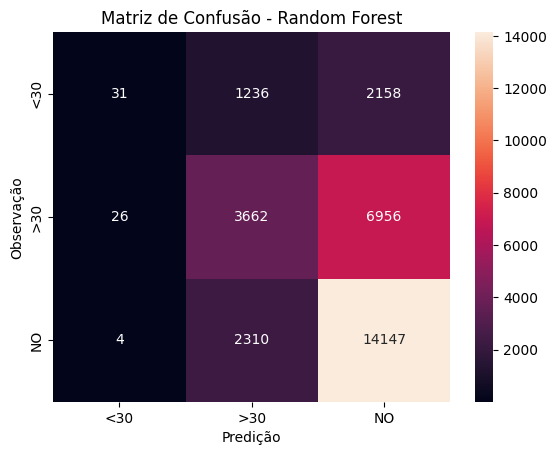

In [6]:
# Previsões com o conjunto de teste
rf_pred = rf_model.predict(X_test)
#lr_pred = lr_model.predict(X_test)
#svm_pred = svm_model.predict(X_test)

# Relatórios de classificação
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))

#print("Logistic Regression Classification Report")
#print(classification_report(y_test, lr_pred))

#print("SVM Classification Report")
#print(classification_report(y_test, svm_pred))

# Matriz de Confusão
labels = np.unique(y_test)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predição')
plt.ylabel('Observação')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [7]:
# GridSearchCV para Random Forest
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [10, 20, 30],
#    'min_samples_split': [2, 5, 10]
#}

#grid_rf = GridSearchCV(
#    RandomForestClassifier(random_state=42),
#    param_grid,
#    cv=5,
#    scoring='accuracy',
#    n_jobs=5 
#)

#grid_rf.fit(X_train, y_train)

#print("Melhores parâmetros:", grid_rf.best_params_)
#print("Melhor acurácia:", grid_rf.best_score_)

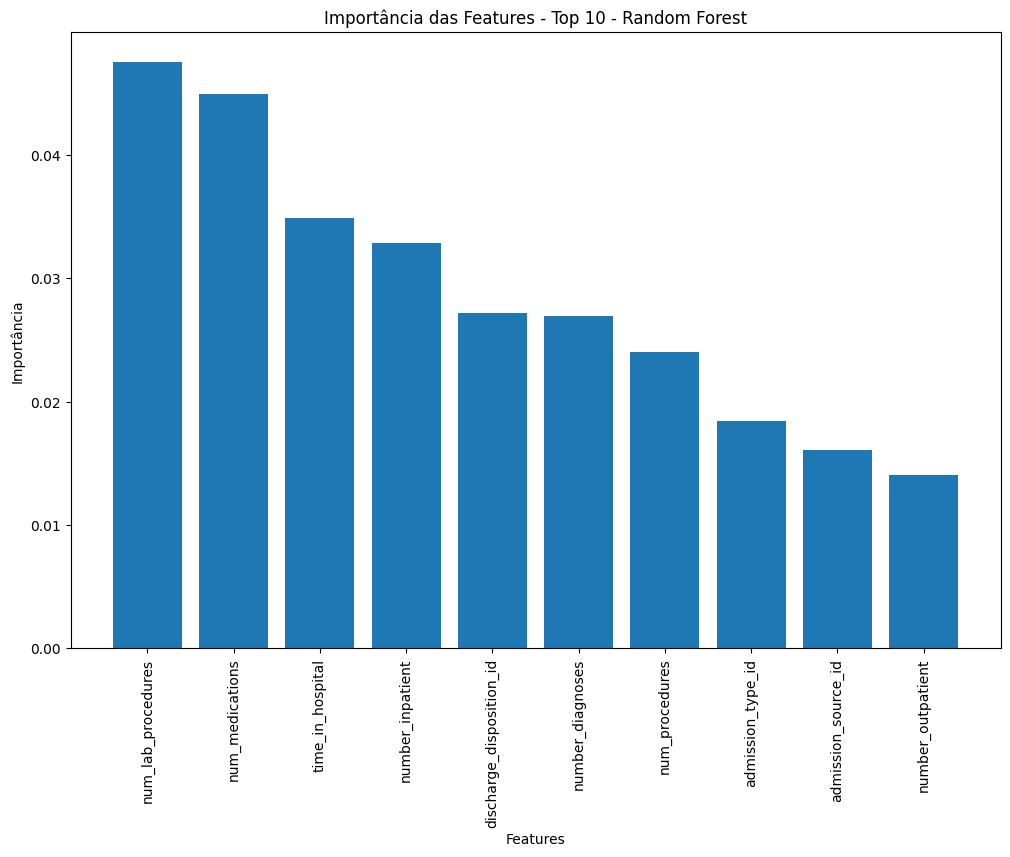

In [8]:
# Importância das Features - Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Selecionar os 10 principais índices
top_n = 10
top_indices = indices[:top_n]

# Plotar Importância das Features
plt.figure(figsize=(12, 8))
plt.title(f"Importância das Features - Top {top_n} - Random Forest")
plt.bar(range(top_n), importances[top_indices], align="center")
plt.xticks(range(top_n), X.columns[top_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importância")
plt.show()